<a href="https://colab.research.google.com/github/nitheesh1904/Text-recognition-in-images-using-easyOCR/blob/main/Text_recognition_from_images_using_easyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing easy OCR library

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
reader = easyocr.Reader(['en'])

# Reading An Image

In [ ]:
path='/content/magnoose.jpg'

In [ ]:

result = reader.readtext(path)
result

# Single Text Identification

In [ ]:
def singleText(path):
  reader = easyocr.Reader(['en'])
  img=plt.imread(path)
  result = reader.readtext(path)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  top_left = tuple(result[0][0][0])
  bottom_right = tuple(result[0][0][2])
  text = result[0][1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  cf=result[0][2]
  img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
  img = cv2.putText(img, text, (bottom_right[0], bottom_right[1] + 20), font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
  plt.imshow(img)
  return plt



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

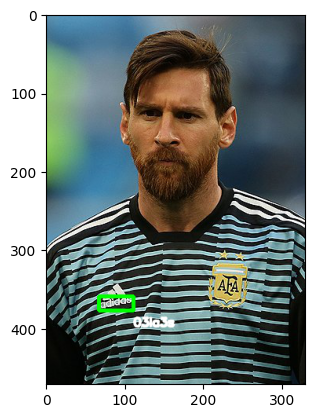

In [ ]:
singleText('/content/Lionel_Messi_20180626.jpg')

# Highlighting all texts in case of multiple text

In [ ]:
def Multiple_text(path):
  result = reader.readtext(path)
  img=cv2.imread(path)
  for detection in result:
    top_left=tuple([int (val) for val in detection[0][0]])
    bottom_right=tuple([int (val) for val in detection[0][2]])
    text=detection[1]
    font=cv2.FONT_HERSHEY_SIMPLEX
    img=cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
    img=cv2.putText(img,text,top_left,font,0.75,(10,15,20),2,cv2.LINE_AA)
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.show()
  return plt

In [ ]:
Multiple_text('/content/magnoose.jpg')

# UI(Multiple Text)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import io

def Multiple_text_ui(img):
    reader = easyocr.Reader(['en'])
    result = reader.readtext(img)
    #img = cv2.imread(path)

    for detection in result:
        top_left = tuple([int(val) for val in detection[0][0]])
        bottom_right = tuple([int(val) for val in detection[0][2]])
        text = detection[1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 5)
        img = cv2.putText(img, text, top_left, font,0.8,(10, 15, 20), 2, cv2.LINE_AA)

    #plt.figure(figsize=(10, 10))
    #plt.imshow(img)
    return img


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

gr.Interface(fn=Multiple_text_ui,inputs='image',outputs='image').launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a8450936d1eeec9ed1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# UI(Single Text)

In [ ]:
def singleText_ui(img):
  reader = easyocr.Reader(['en'])
  result = reader.readtext(img)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  top_left = tuple(result[0][0][0])
  bottom_right = tuple(result[0][0][2])
  text = result[0][1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  cf=result[0][2]
  img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
  img = cv2.putText(img, text, (bottom_right[0], bottom_right[1] + 20), font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
  return img



In [ ]:
import gradio as gr

gr.Interface(fn=singleText_ui,inputs='image',outputs='image').launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f1234a0d987d8c830e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
